# EDA

- Histograms sanity check
- Representatives from each group
- Aggregation of the data by Ilan's lab
  - See if improves reprentatives
- Heirechical Clustering
- Supervised classification

In [172]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from preprocessing import *
from config import *
np.random.seed(42)

### Load data

In [130]:
track_length = 32

In [173]:
v_size = len(np.where(np.isin(y,['D2']))[0])

In [179]:
# np.random.choice(np.where(np.isin(y,['D2']))[0],replace=False,size = v_size//2)

In [178]:
y = np.load(rf'data_files\labels_All{track_length}.npy')
y = y[np.where(~np.isin(y,['D3','G5','G6']))]
y.shape

(3897,)

In [152]:
x = np.load(rf'data_files\features_All{track_length}.npy')
x = x[np.where(~np.isin(y,['D3','G5','G6']))]
x.shape

(3897, 32, 5)

In [153]:
x_re = x.reshape(-1, x.shape[-1])
x_re.shape

(124704, 5)

## Histograms

### Latitude, Longtitude

<AxesSubplot:>

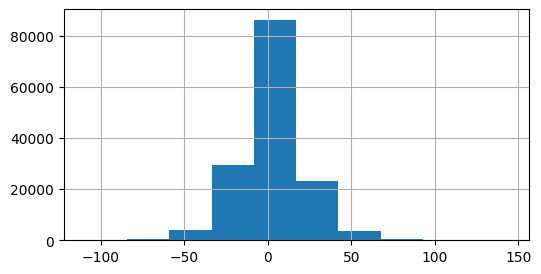

In [44]:
pd.Series(x_re[:,0]).hist(figsize = (6,3))

<AxesSubplot:>

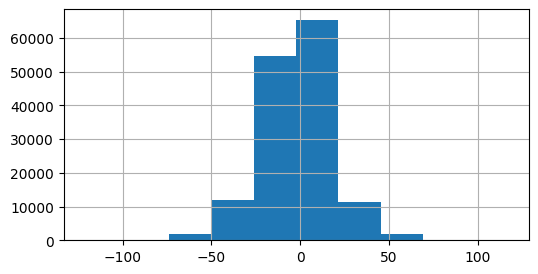

In [45]:
pd.Series(x_re[:,1]).hist(figsize = (6,3))

### Area

<AxesSubplot:>

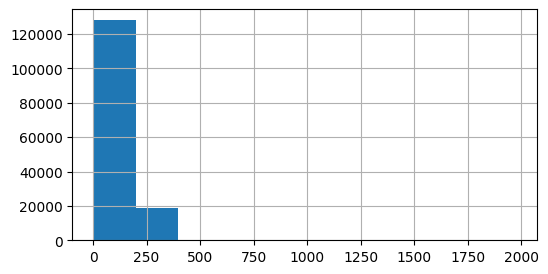

In [46]:
pd.Series(x_re[:,2]).hist(figsize = (6,3))

In [27]:
pd.Series(x_re[:,2]).describe()

count    147200.000000
mean        150.136902
std          52.307520
min           2.000000
25%         117.000000
50%         140.000000
75%         172.000000
max        1977.000000
dtype: float64

### Major Axis, Minor Axis

<AxesSubplot:>

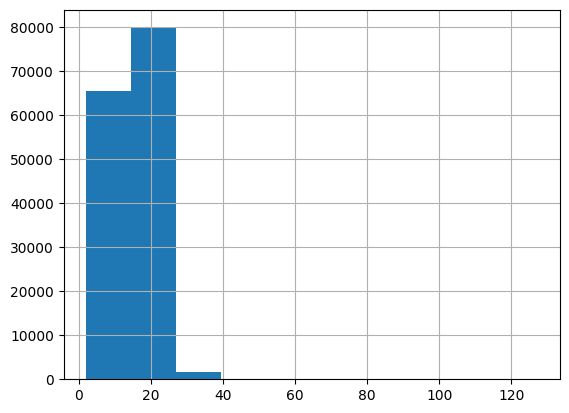

In [22]:
pd.Series(x_re[:,3]).hist()

<AxesSubplot:>

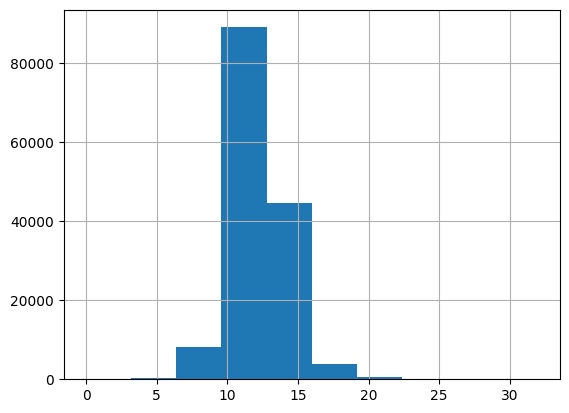

In [23]:
pd.Series(x_re[:,4]).hist()

## Normalize

In [155]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x.reshape(-1, x.shape[-1])).reshape(x.shape)
x_norm.shape

(3897, 32, 5)

In [156]:
no_outliers_idx = idx_no_outliers_after_norm(x_norm)
x_norm_no_out = x_norm[no_outliers_idx]
x_norm_no_out.shape

(3864, 32, 5)

In [157]:
x_norm_no_out_re = x_norm_no_out.reshape(-1, x_norm_no_out.shape[-1])
x_norm_no_out_re.shape

(123648, 5)

### Histograms

<AxesSubplot:>

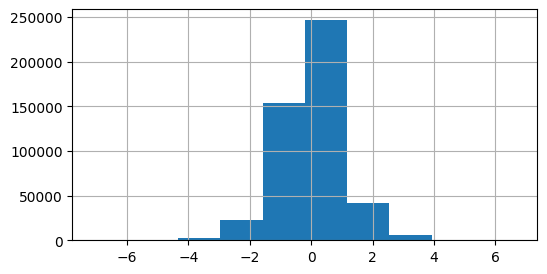

In [105]:
pd.Series(x_norm_no_out_re[:,0]).hist(figsize = (6,3))

<AxesSubplot:>

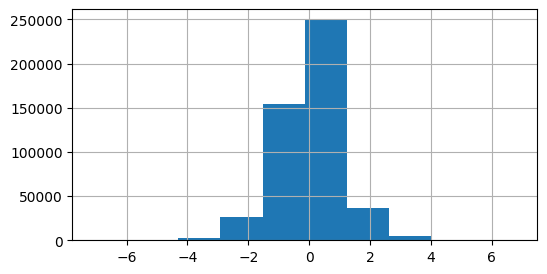

In [106]:
pd.Series(x_norm_no_out_re[:,1]).hist(figsize = (6,3))

<AxesSubplot:>

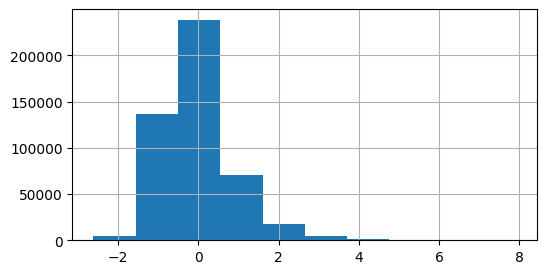

In [107]:
pd.Series(x_norm_no_out_re[:,2]).hist(figsize = (6,3))

<AxesSubplot:>

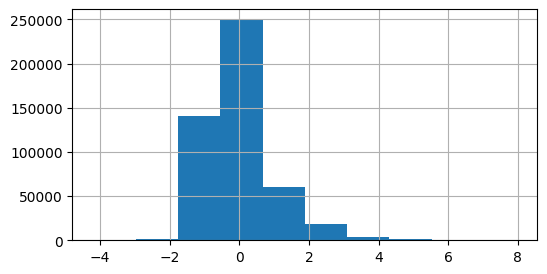

In [108]:
pd.Series(x_norm_no_out_re[:,3]).hist(figsize = (6,3))

<AxesSubplot:>

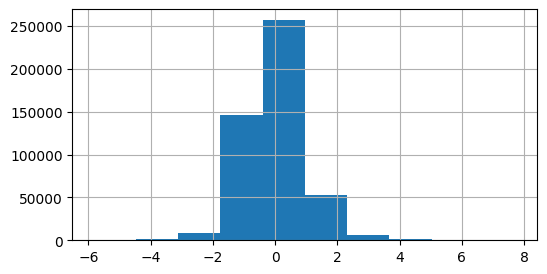

In [109]:
pd.Series(x_norm_no_out_re[:,4]).hist(figsize = (6,3))

## Label distribution

- Well distribution

In [154]:
y.shape

(3897,)

In [158]:
y_no_out = y[no_outliers_idx]
y_no_out.shape

(3864,)

<AxesSubplot:>

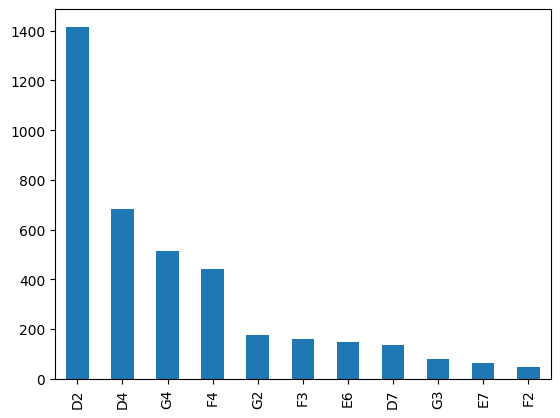

In [159]:
pd.Series(y_no_out).value_counts().plot.bar()

In [160]:
y2treat = pd.Series(y_no_out).map(wells_to_genetype_dict)

<AxesSubplot:>

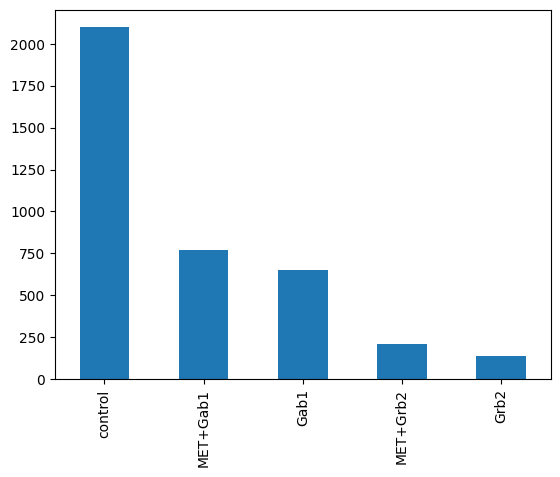

In [161]:
y2treat.value_counts().plot.bar()

## Data Transformation

In [180]:
X_train = x_norm_no_out.copy()
traj = X_train[:,:,:2]
traj.shape

(3864, 32, 2)

In [181]:
displacement = np.sum(traj**2,axis=2)
displacement.shape

(3864, 32)

In [117]:
from tslearn.clustering import TimeSeriesKMeans
n_clusters = 4

model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=10)
model.fit(displacement)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=4)

In [118]:
pd.Series(model.predict(displacement)).value_counts()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 29643 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


2    18207
0     7768
1     3093
3      575
dtype: int64

In [119]:
y_pred = model.predict(displacement)
y_pred.shape

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 29643 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


(29643,)

In [120]:
import matplotlib.pyplot as plt

def plot_representatives(rep_groups,figsize = (10,20)):
    l = len(rep_groups[0])
    L = len(rep_groups)
    fig, axs = plt.subplots(l,L, figsize=figsize,sharey=True,sharex=True)
    fig.tight_layout()
    for j,reps in enumerate(rep_groups):
        for i,rep in enumerate(reps):
            axs[i,j].plot(rep[:,0],rep[:,1])
    fig.show()

C:\Users\asafavra\AppData\Local\Temp\ipykernel_29576\2935268240.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


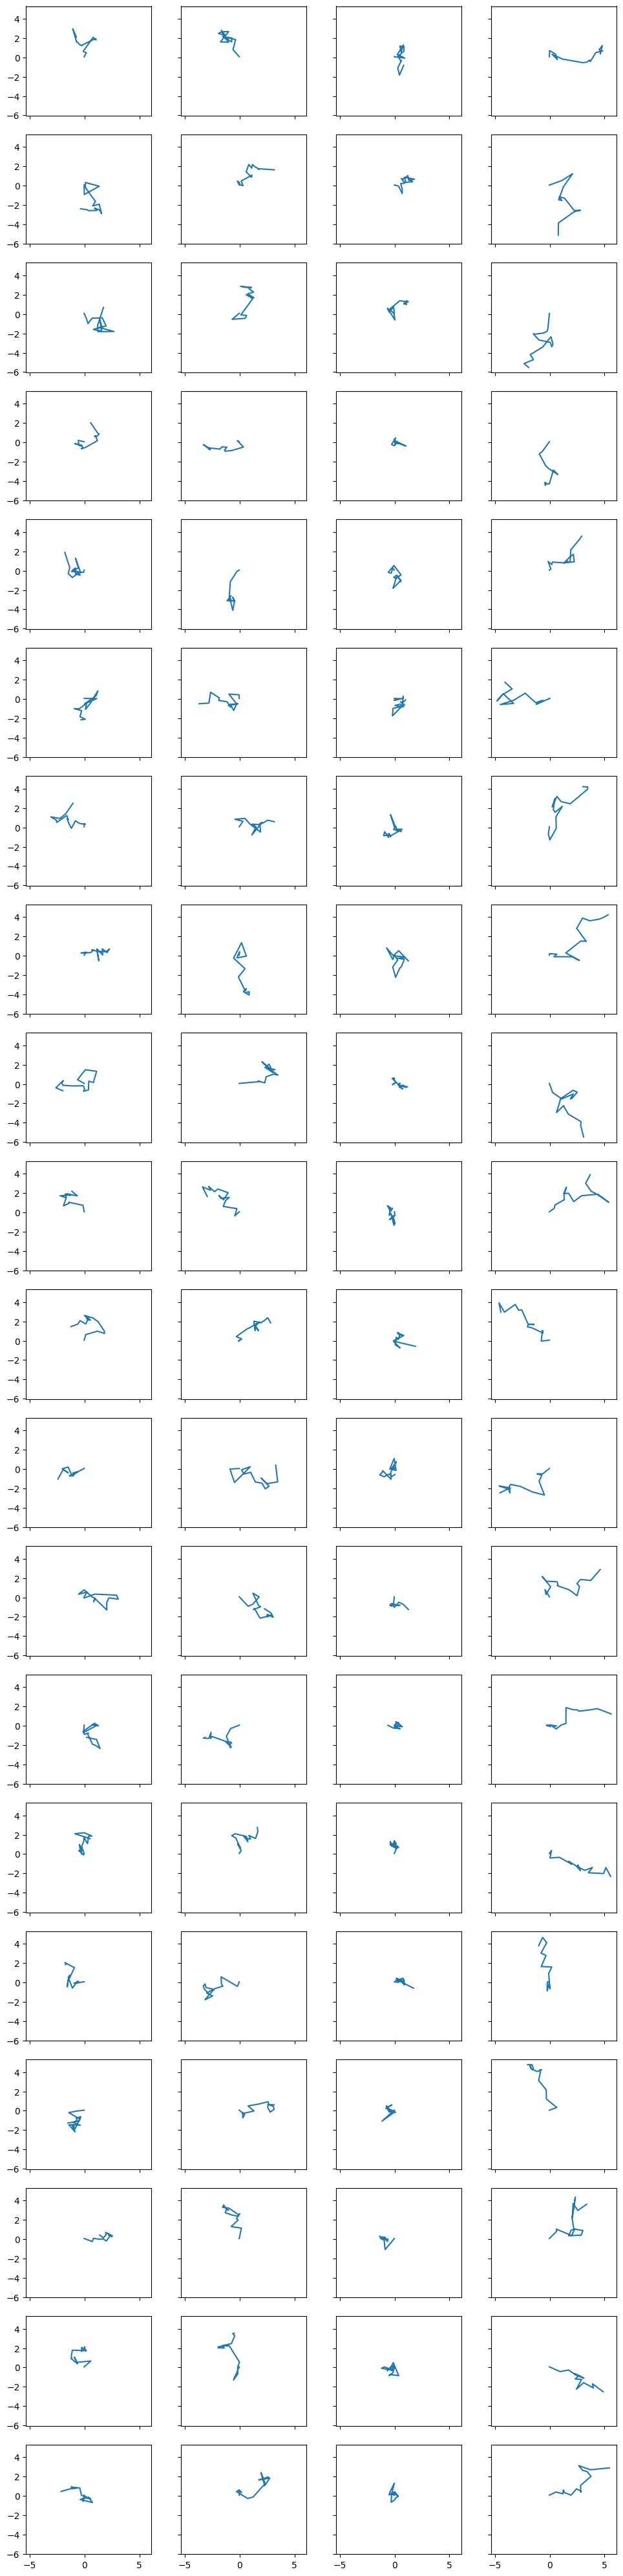

In [121]:
rep_list = []
size = 20
for i in range(n_clusters):
  cluster_vec = x_norm_no_out[np.where(np.isin(y_pred,[i]))]
  cluster_list = cluster_vec[np.random.choice(cluster_vec.shape[0], size, replace=False)]
  rep_list.append(cluster_list)

plot_representatives(rep_list,figsize = (10,40))

In [16]:
neut1 = ['D2','D3','D4']
neut2 = ['G5','G6','G7']
gab1 = ['F2','F3','F4']
gab1_met = ['G2','G3','G4']
grb2 = ['D5','D6','D7']
grb2_met = ['E5','E6','E7']

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2634 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


<AxesSubplot:>

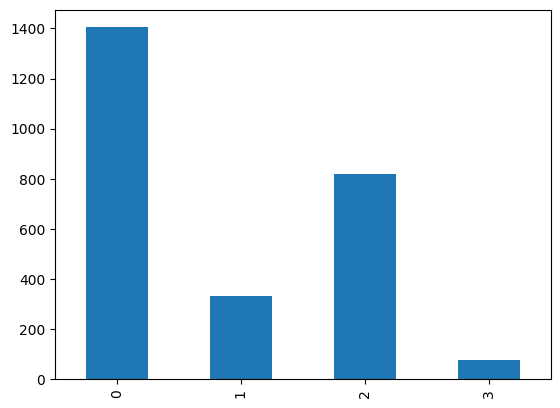

In [94]:
treat_well = model.predict(displacement[np.where(np.isin(y_no_out,neut1))])
pd.Series(treat_well).value_counts().sort_index().plot.bar()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 780 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


<AxesSubplot:>

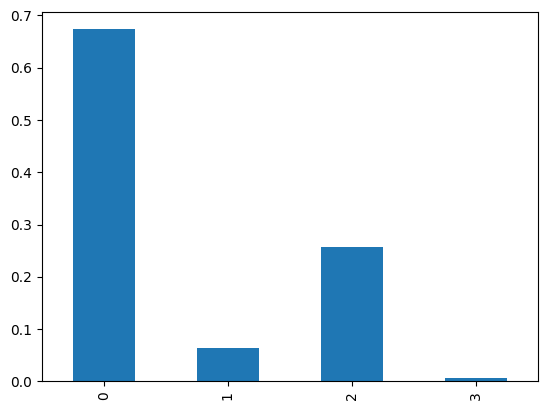

In [91]:
treat_well = model.predict(displacement[np.where(np.isin(y_no_out,gab1_met))])
pd.Series(treat_well).value_counts(normalize=True).sort_index().plot.bar()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 209 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


<AxesSubplot:>

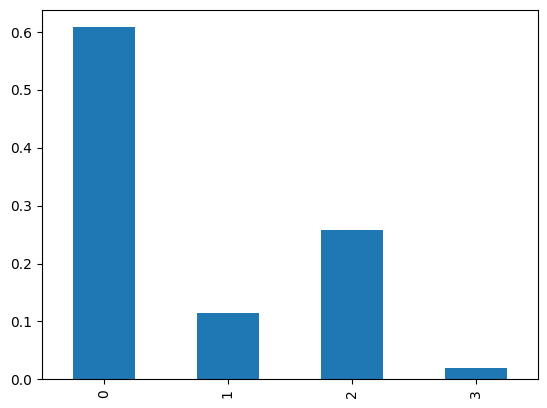

In [90]:
treat_well = model.predict(displacement[np.where(np.isin(y_no_out,grb2_met))])
pd.Series(treat_well).value_counts(normalize=True).sort_index().plot.bar()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 651 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


<AxesSubplot:>

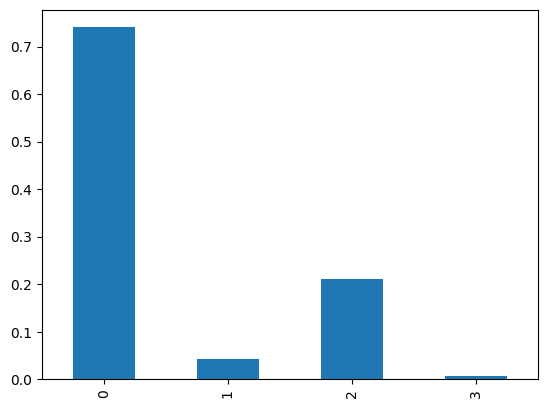

In [89]:
treat_well = model.predict(displacement[np.where(np.isin(y_no_out,gab1))])
pd.Series(treat_well).value_counts(normalize=True).sort_index().plot.bar()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 136 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


<AxesSubplot:>

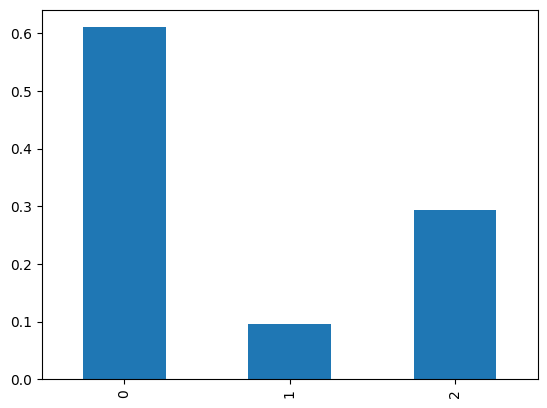

In [88]:
treat_well = model.predict(displacement[np.where(np.isin(y_no_out,grb2))])
pd.Series(treat_well).value_counts(normalize=True).sort_index().plot.bar()

## Representatives

In [ ]:
rep_list = []
size = 10
for i in range(n_clusters):
  cluster_vec = x[np.where(np.isin(y_pred,[i]))]
  cluster_list = cluster_vec[np.random.choice(cluster_vec.shape[0], size, replace=False)]
  rep_list.append(cluster_list)

plot_representatives(rep_list,figsize = (10,20))

In [45]:
# x_s = np.array([[[0,0],[2,2],[2,2]] , [[0,0],[1,1],[2,2]] ,[[0,0],[3,3],[2,2]]])
# x_s